In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider, FloatSlider

# Special random variables

The following sections introduce the various special random variables.

 * These are frequently encountered.
 * Useful and fundamentally important.

## Bernoulli Random variable (Bernoulli trial)

* Experiment is one of success/failure

* $X = 1$ on success
* $X = 0$ on failure
* $P(X=1) = p$
* $P(X=0) = 1-p$


Note that

* $E[X] = p$
* $Var(X) = p(1-p)$

## Binomial Random variable

* $n$ independent Bernoulli trials (with probability $p$ for success)
* $X$ is number of successes

Clearly:

* $P[X=i] = {{n}\choose{i}} p^i (1-p)^{n-i}$ where $i=0, 1, \ldots n$

if $X = \sum_{i=1}^n X_i$

* $E[X] = np$

* $Var(X) = np(1-p)$

* Called the binomial random variable with parameters $(n,p)$.

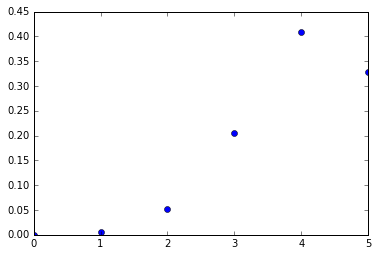

In [5]:
from scipy.stats import binom
import numpy as np

rv = binom(5, 0.8)
x = np.arange(0, 6)
plt.plot(x, rv.pmf(x), 'o')

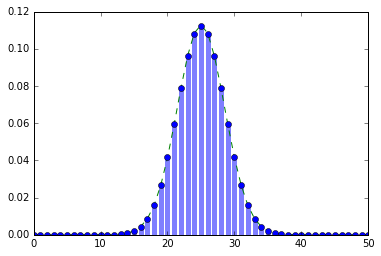

In [6]:
import numpy as np
from scipy.stats import binom, norm

def plot_binom(n, p):
    rv = binom(n, p)
    x = np.arange(0, n+1)
    # Compare with a normal distribution
    mu, sigma = n*p, np.sqrt(n*p*(1-p))
    plt.plot(x, norm.pdf(x, loc=mu, scale=sigma), 'g--')
    plt.plot(x, rv.pmf(x), 'bo')
    plt.vlines(x, 0, rv.pmf(x), colors='b', alpha=0.5, lw=5)

#plot_binom(5, 0.1)    
interact(plot_binom, n=FloatSlider(min=1, max=100, value=5, step=1), p=(0.01, 0.99, 0.01))
#interact(plot_binom, n=(1, 100), p=(0.01, 0.99))

See that as $n$ increases it seems to behave like a Gaussian.

Note that:

* $P[X = k+1] = \frac{p}{1-p} \frac{n-k}{k+1} P[X=k]$


----

## The Poisson random variable

$X = 0, 1, 2, \ldots$ with parameter $\lambda>0$ such that,

 * $P[X=i] = e^{-\lambda} \frac{\lambda^i}{i!}$


**Exercise**

Show that this is a proper PMF, i.e. $\sum_{i=0}^\infty p(i) = 1$

sdasd


MGF is given as

* $\phi(t) = E[e^{tX}] = \exp({\lambda(e^t -1)})$
* $E[X] = \lambda$
* $Var(X) = \lambda$

* This approximates the binomial RV when $n$ is large and $p$ is small.
* That is for large $n$ and small $p$:
$P [X=i] \approx e^{-\lambda} \frac{\lambda^i}{i!}$


**Examples**

1. Number of wrong telephone numbers dialled in a day by all students.
2. Number of customers visiting a shop on a given day.
3. Number of misprints on a page.
4. Number of $\alpha$ particles discharged in time $T$ from a radioactive substance.



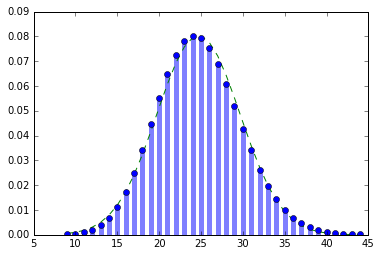

In [7]:
from scipy.stats import poisson, norm

def plot_poisson(lamda):
    rv = poisson(lamda)
    min, max = rv.ppf(0.0001), rv.ppf(0.9999)
    x = np.arange(min, max)
    plt.plot(x, norm.pdf(x, loc=lamda, scale=np.sqrt(lamda)), 'g--')
    plt.plot(x, rv.pmf(x), 'bo')
    plt.vlines(x, 0, rv.pmf(x), colors='b', alpha=0.5, lw=5)
interact(plot_poisson, lamda=FloatSlider(min=0.0, max=100, value=4))


Exercise
--------

Suppose that the average number of accidents occurring weekly on a particular stretch of a highway equals 3. Calculate the probability that there is at least one accident this week.

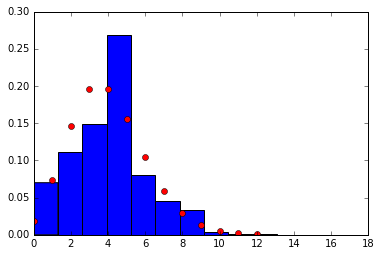

In [27]:
# Demo of generating random numbers given a distribution using Python.
from scipy.stats import poisson
rv = poisson(4)
values = rv.rvs(1000000)
plt.hist(values, bins=13,normed=True)
x = range(0, 13)
plt.plot(x, rv.pmf(x), 'ro')

Note
------

* Foo $P\{X=i+1\} = \frac{\lambda}{i+1} P\{X=i\}$
* The sum of independent Poisson random varialbes is also a Poisson RV.
    * Proof using MGF.
    
-----


## The Uniform Random Variable

$f(x) = \frac{1}{\beta - \alpha}$ when 
$\alpha \leq x \leq \beta$ and 0 otherwise

* This is a continuous RV

* $E[X] = (\alpha + \beta)/2$
* $Var(X) = (\beta - \alpha)^2/12$

* Available in `numpy.random.random`


**Aside**

* Blind experiment
* Double blind experiment


## Normal random variables

Given parameters $\mu$ and $\sigma^2$, we have:

$f(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} e^{-(x-\mu)^2/(2\sigma^2)}$

* We'll be seeing quite a bit of this RV.
* Approximates binomial when $n$ is large, lets see this!


* Many measurements are distributed normally.
* Velocity in any direction of a molecule of gas.
* Variation in height of a person.



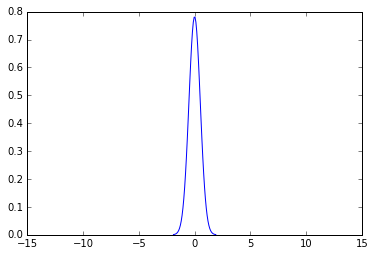

In [28]:
from scipy.stats import norm

def plot_normal(mu, sigma):
    rv = norm(loc=mu, scale=sigma)
    min, max = rv.ppf(0.0001), rv.ppf(0.9999)
    diff = max - min
    x = np.linspace(min, max)
    plt.xlim(-15, 15)
    plt.plot(x, rv.pdf(x))
interact(plot_normal, mu=FloatSlider(min=-10., max=10., value=0.0), 
         sigma=FloatSlider(min=0.01, max=10, value=1.0))

We can show that:

* $E[X] = \mu$
* $Var(X) = \sigma^2$
* $E[a + bX] = a + b\mu$
* $Var(a + bX) = b^2\sigma^2$
* MGF = $exp(\mu t + \sigma^2 t^2/2)$

### Standard/unit Normal Distribution

If $Z = \frac{X-\mu}{\sigma}$

Then $Z$ has mean 0 and variance 1, this is a standard normal distribution, we denote $\phi$ as the distribution function:

$\phi(x) = \frac{1}{\sqrt{2 \pi}} \int_{-\infty}^x e^{-y^2/2} dy$

Therefore:

$P\{X<b\} = P \left\{ \frac{X-\mu}{\sigma} < \frac{b-\mu}{\sigma}\right\}$

$P\{X<b\} = \phi(\frac{b-\mu}{\sigma})$

Also,
$P\{a<X < b \} = \phi(\frac{b-\mu}{\sigma}) - \phi(\frac{a-\mu}{\sigma})$


By symmetry:

$\phi(-x) = P\{Z < -x \} = P\{Z > x \} = 1 - \phi(x)$ 

-----

**Useful results**

* Sum of independent normal RVs is also normal.

    * Let $X_i$ be normal with $\mu_i, \sigma_i$ and consider MGF.

    * Note that if MGF/moments are same, then distribution is same.


For $0< \alpha < 1$, let $z_\alpha$ be such that,

$P\{Z > z_\alpha \} = 1 - \phi(z_\alpha) = \alpha$

Clearly,

$P\{Z < z_\alpha \} = 1 - \alpha$


0.0499849055391
1.64485362695


(array([   2.,    1.,    1.,    1.,    4.,    9.,   12.,   11.,   18.,
          34.,   42.,   70.,   93.,  138.,  170.,  220.,  296.,  300.,
         424.,  451.,  523.,  577.,  641.,  654.,  616.,  675.,  626.,
         596.,  506.,  448.,  396.,  317.,  284.,  227.,  181.,  138.,
          99.,   72.,   40.,   31.,   19.,   21.,    6.,    5.,    3.,
           1.,    0.,    0.,    0.,    1.]),
 array([-3.99620389, -3.83284972, -3.66949556, -3.5061414 , -3.34278724,
        -3.17943307, -3.01607891, -2.85272475, -2.68937059, -2.52601642,
        -2.36266226, -2.1993081 , -2.03595393, -1.87259977, -1.70924561,
        -1.54589145, -1.38253728, -1.21918312, -1.05582896, -0.8924748 ,
        -0.72912063, -0.56576647, -0.40241231, -0.23905815, -0.07570398,
         0.08765018,  0.25100434,  0.4143585 ,  0.57771267,  0.74106683,
         0.90442099,  1.06777516,  1.23112932,  1.39448348,  1.55783764,
         1.72119181,  1.88454597,  2.04790013,  2.21125429,  2.37460846,
         2.53796

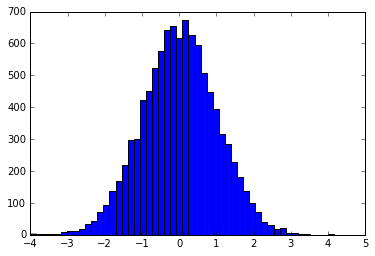

In [33]:
from scipy.stats import norm
rv = norm(loc=0.0, scale=1)

print rv.sf(1.645) # This is 1 - phi(x)
print rv.isf(0.05) # this is the inverse, i.e. given alpha, it gives $z_\alpha$
plt.hist(rv.rvs(10000), bins=50)

## Exponential Random Variables

For $\lambda > 0$,

$f(x) = \lambda e^{-\lambda x}$ when $x \geq 0$ and 0 otherwise


$F(x) = 1 - e^{-\lambda x}$ when $x \geq 0$.


This is the amount of time until some specific event occurs:

* Time until an earthquake occurs
* Time until a telephone call is a wrong number.


* $E[X] = 1/\lambda$
* $Var(X) = 1/\lambda^2$
* MGF:  $\lambda/(\lambda - t)$ when $t<\lambda$.

The Exponential distribution is memoryless.

* $P\{ X > s+t | X> t \} = P \{ X > s \} \forall s, t \geq 0$

This means that if an item is functioning, it is as good as new!


Examples
----------

- The time between events in a *Poisson process*.
- Poisson process: events occur independently, continuously at a constant average rate.

- Time it takes before your next phone call (at a specified time of day/week)
- Time between clicks of a Gieger counter.




Exercise
---------

How do you show that this distribution is memoryless?



<function __main__.exp>

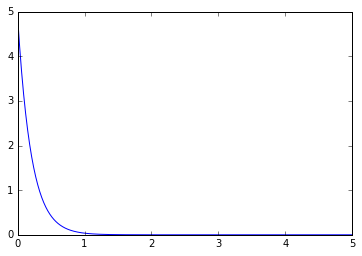

In [7]:
def exp(lamda):
    x = np.linspace(0, 10, 1000)
    plt.plot(x, lamda*np.exp(-lamda*x))
    plt.xlim(0, 5); plt.ylim(0, 5)
interact(exp, lamda=(0, 10, 0.1))

## Chi-squared distribution

Let $Z_1, Z_2 ... Z_n$ be independent standard normal random variables, then

$X = Z_1^2 + Z_2^2 + ... + Z_n^2$

is a chi-squared distribution with $n$ degrees of freedom ($X \sim \chi_n^2$).

Obviously, if $X_1$ and $X_2$ are independent chi-square distributions with $n_1$ and $n_2$ dof, their sum is 
also chi-square but with $n_1+n_2$ degrees of freedom.

* $E[X] = n$
* $Var(X) = 2n$

Same as gamma distribution with $\alpha=n/2$ and $\lambda = 1/2$

Useful to define a quantity $\chi_{\alpha, n}^2$ such that:

$P\{X \geq \chi_{\alpha, n}^2\} = \alpha$


In [ ]:
from scipy.stats import chi2

def plot_chi2(n):
    rv = chi2(n)
    min, max = rv.ppf(0.0001), rv.ppf(0.9999)
    x = np.linspace(min, max, 200)
    #plt.xlim(0, 15)
    plt.ylim(0, 0.25)
    plt.plot(x, rv.pdf(x))

interact(plot_chi2, n=(1, 20, 1))

Nice example from textbook!
-----------------------------

When we attempt to locate a target in two-dimensional space, suppose that the coordinate errors are independent normal random variables with mean 0 and standard deviation 2. Find the probability that the distance between the point chosen and the target exceeds 3.

----

## Student's t-distribution

Consider independent $Z$ and $\chi_n^2$ then,

$T_n = \frac{Z}{\sqrt{(\chi_n^2)/n}}$

Note from the definition of the chi-square function that 
when $n$ is large $T_n$ has a similar distribution to $Z$.

* $E[T_n] = 0$
* $Var(T_n) = \frac{n}{n-2}$

<function __main__.plot_t>

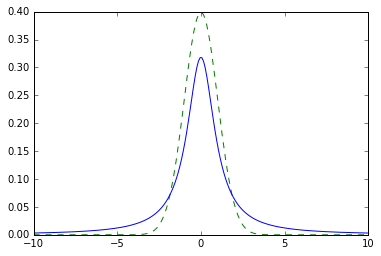

In [10]:
from scipy.stats import t, norm

def plot_t(n):
    rv = t(n)
    x = np.linspace(-10, 10, 200)
    plt.plot(x, norm.pdf(x), 'g--')
    plt.plot(x, rv.pdf(x))

interact(plot_t, n=IntSlider(min=1, max=20, step=1, value=1))

-----

## The Gamma distribution

$f(x) = \frac{\lambda^\alpha x^{\alpha -1} e^{-\lambda x}}{\Gamma(\alpha)}$

with $\lambda, \alpha >0$ and $x\geq 0$.

One can show that:
* $\Gamma(1) = 1$
* $\Gamma(\alpha) = (\alpha -1)\Gamma(\alpha -1)$
* $\Gamma(n) = (n-1)!$
* $\chi_2$ with $n$ dof is same as $\Gamma(n/2), \lambda = 1/2$

<function __main__.plot_gamma>

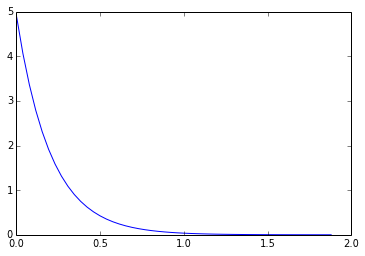

In [8]:
from scipy.stats import gamma


def plot_gamma(alpha, lamda):
    rv = gamma(a=alpha, scale=1.0/lamda)
    min, max = rv.ppf(0.00001), rv.ppf(0.9999)
    x = np.linspace(min, max)
    #plt.xlim(-15, 15)
    #plt.ylim(0, 0.25)
    plt.plot(x, rv.pdf(x))

interact(plot_gamma, alpha=FloatSliderWidget(min=0.0, max=50, step=0.1, value=1), lamda=(0.0, 10, 0.1))

----